[SOM](https://www.datacamp.com/tutorial/self-organizing-maps)

In [ ]:
! pip install sklearn-som

In [ ]:
! pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=f22f2801e8aa86579c205341b6c9150f87e3088692d29828dc046eff2f2f535f
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset_iris = datasets.load_iris()
data_iris = dataset_iris.data
target_iris = dataset_iris.target
data_iris_normalized = MinMaxScaler().fit_transform(data_iris)
labels_iris = {1:'1', 2:'2', 3:'3'}
data = data_iris_normalized
target = target_iris

In [ ]:
SOM_X_AXIS_NODES  = 8
SOM_Y_AXIS_NODES  = 8
SOM_N_VARIABLES  = data.shape[1]

In [ ]:
som = MiniSom(SOM_X_AXIS_NODES, SOM_Y_AXIS_NODES, SOM_N_VARIABLES)

In [ ]:
ALPHA = 0.5
DECAY_FUNC = 'linear_decay_to_zero'
SIGMA0 = 1.5
SIGMA_DECAY_FUNC = 'linear_decay_to_one'
NEIGHBORHOOD_FUNC = 'triangle'
DISTANCE_FUNC = 'euclidean'
TOPOLOGY = 'rectangular'
RANDOM_SEED = 123

In [ ]:
som = MiniSom(
        SOM_X_AXIS_NODES,
        SOM_Y_AXIS_NODES,
        SOM_N_VARIABLES,
        sigma=SIGMA0,
        learning_rate=ALPHA,
        neighborhood_function=NEIGHBORHOOD_FUNC,
        activation_distance=DISTANCE_FUNC,
        topology=TOPOLOGY,
        sigma_decay_function = SIGMA_DECAY_FUNC,
        decay_function = DECAY_FUNC,
        random_seed=RANDOM_SEED,
        )

/usr/local/lib/python3.11/dist-packages/minisom.py:235: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +


In [ ]:
som.pca_weights_init(data)

/usr/local/lib/python3.11/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


In [ ]:
N_ITERATIONS = 5000
som.train_random(data, N_ITERATIONS, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.055292768075146104


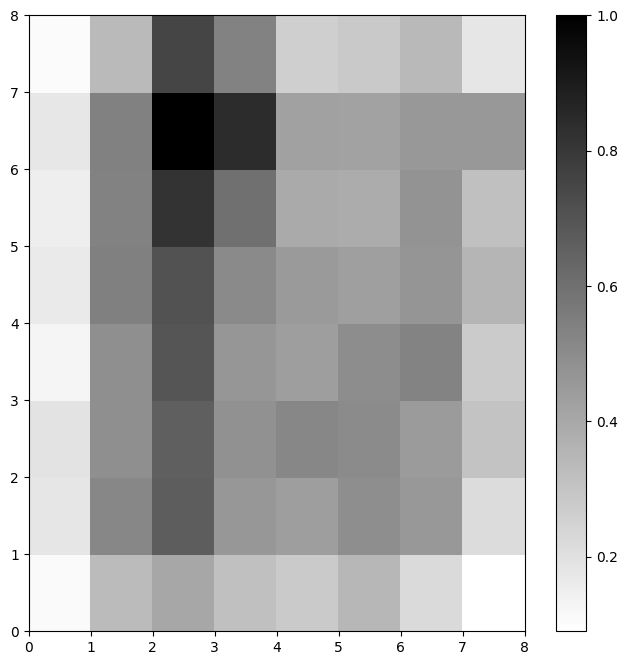

In [ ]:
# create the grid
plt.figure(figsize=(8, 8))
#plot the distance map
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
# show the color bar
plt.colorbar()
plt.show()

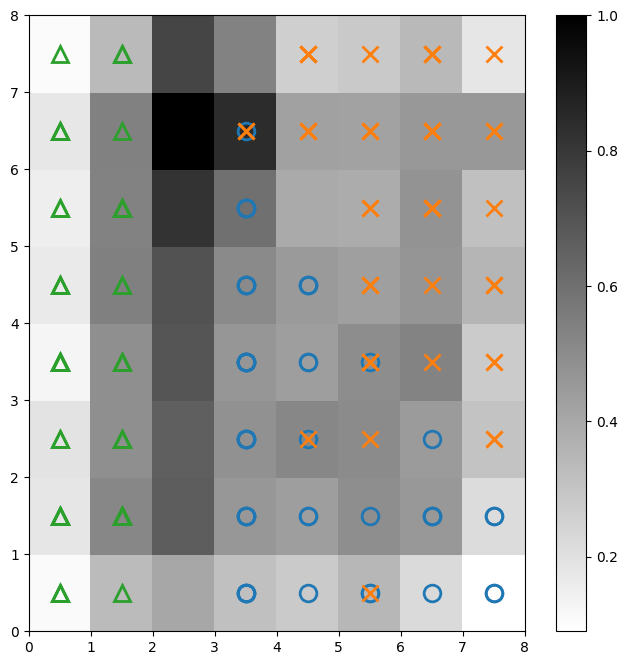

In [ ]:
# plot the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()
# create the markers and colors for each class
markers = ['o', 'x', '^']
colors = ['C0', 'C1', 'C2']
# plot the winning neuron for each data point
for count, datapoint in enumerate(data):
    # get the winner
    w = som.winner(datapoint)
    # place a marker on the winning position for the sample data point
    plt.plot(w[0]+.5, w[1]+.5, markers[target[count]-1], markerfacecolor='None',
             markeredgecolor=colors[target[count]-1], markersize=12, markeredgewidth=2)
plt.show()

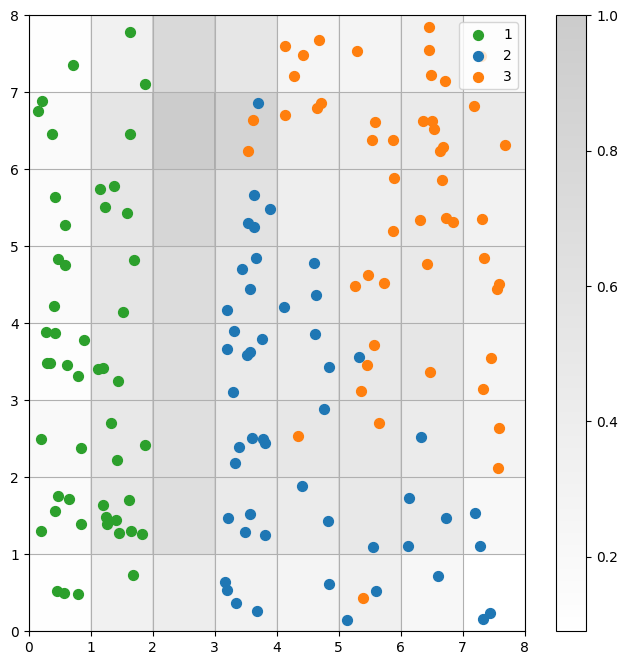

In [ ]:
# get the X and Y coordinates of the winning neuron for each data point
w_x, w_y = zip(*[som.winner(d) for d in data]) # Fixed: Added a line break here
w_x = np.array(w_x)
w_y = np.array(w_y)
# plot the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg', alpha=.2)
plt.colorbar()
# make a scatter plot of all the winning neurons for each data point
# add a random offset to each point to avoid overlaps
for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50,
                c=colors[c-1],
                label=labels_iris[c+1]
                )
plt.legend(loc='upper right')
plt.grid()
plt.show()